# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats
import matplotlib.pyplot as plt
from numpy import array

import seaborn as sns

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
black = data[data.race == 'b']
bmean = black.call.mean()
bvar = black.call.var()

In [9]:
white = data[data.race == 'w']
wmean = white.call.mean()
wvar = white.call.var()
wstd = white.call.std()

wmean

0.09650924056768417

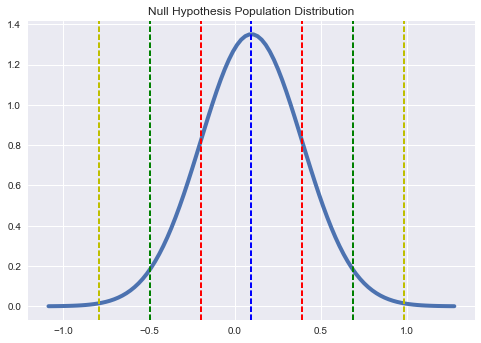

'0.09650924056768417 - 0.2953455150127411'

In [10]:
white_dist = scipy.stats.norm(wmean, wstd)

def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

xs, ys = eval_pdf(white_dist)
plt.plot(xs, ys, label='call', linewidth=4)
plt.axvline(white_dist.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(white_dist.mean() - white_dist.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(white_dist.mean() + white_dist.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(white_dist.mean() - (white_dist.std() * 2), color='g', linestyle='dashed', linewidth=2)
plt.axvline(white_dist.mean() + (white_dist.std() * 2), color='g', linestyle='dashed', linewidth=2)
plt.axvline(white_dist.mean() - (white_dist.std() * 3), color='y', linestyle='dashed', linewidth=2)
plt.axvline(white_dist.mean() + (white_dist.std() * 3), color='y', linestyle='dashed', linewidth=2)
plt.title('Null Hypothesis Population Distribution')
plt.show()

'{} - {}'.format(wmean, wstd)

### 1.Get standard deviation of population sample assuming null hypothesis is true. Which is the square root of the white resume sample standard deviation divided by the square root of the sample size.
### 2. Figure out how many standard deviations away from the mean we need to go to get the mean of the black resume sample.

In [11]:
sample_mean_diff = wmean - bmean
null_hyp_pop_std = (wstd**.5 / white.call.count()**.5)

zscore_from_mean = sample_mean_diff/null_hyp_pop_std
zscore_from_mean

2.9085728008246483

### The number of standard deviations away from the mean we have to be to get the black sample mean in a distribution of the population assuming that the null hypothesis is true is 2.9. Since we know that the critical z-value of 95% significance is 1.96 standard deviations away from the mean by looking at a Z-Table, than we know that the probability that getting the black sample mean of the calls returned assuming the null hypothesis is true, is not only less than 5%, but also less than 1%. This means that we should reject the null hypothesis, and come to the conclusion that race * DOES * in fact have an effect on whether you will get a call back or not.

### To get the true population, we divide the standard deviation of the white sample by the square root of the sample size. The true population "assuming our null hypothesis is true" is .005, and our 95% confidence interval is  .085 to .108

In [7]:
z = 1.96
conf_int = '{} - {}'.format(wmean - (null_hyp_pop_std*z), wmean + (null_hyp_pop_std*z))
conf_int

NameError: name 'null_hyp_pop_std' is not defined

# Answers
* ### 1) The questions is whether race simply 'has' an effect. It doesn't mention whether it is looking for a negative or positive effect. Because of this the appropriate test for this is a two tailed test. 
    * #### The central limit theorem does apply because as we approach taking an infinite amount of means of random samples selected from the sample of resumes, the distribution looks more and more normal.
* ### 2A) Null Hypothesis = Race has no effect on the probability of getting a call back or not.
* ### 2B) Alt. Hypothesis = Race does have an effect on the probability of getting a call back or not.
* ### 3A) Confidence Interval = We can be confident that 95% of time we select a random sample fom the true population of means, given our null hypothesis is true, it will be between .074, and .118
* ### 3B) Margin of Error = Our margin of error is about 16.6 percent
* ### 3C) P-Value = The p-value for our null hypothesis is .018%
* ### 4) Story = If our hypothesis is correct that race, in this case that how black or white sounding your name is on your resume is, has no effect on how likely you will get a call back or not, the probability that getting the average of calls returned for black sounding resumes is less than 1 percent. Given this, we can strongly reject our null  hypothesis, and conclude that race does in fact have an effect on whether or not you will get a call back or not.
* ### 5) There would be no way of knowing this unless we checked the correlation between all of the features of the resume, and the target feature of callback success.

## ========================================================
### When to get the std of the true population by getting std of sample divided by sqrt of sample size, and when to get the sqrt of the product of a true or false probablity divided by the sqrt of the saple size ?
## ========================================================